# Gamblers Problem:

**Date:** April 30nd 2023

**Authors:** Lucas Jacobs

**Teacher:** Iman Mossavat


## Table of Contents
1. [Introduction](#Introduction)
2. [Code explanation](#Code_explanation)
3. [The results as is in figure 4.3 in the book](#The_results_as_is_in_figure_4.3_in_the_book)
4. [References](#References)

## Introduction
The gamblers problem solves a problem where a gambler has a certain amount of money (capital) and it wants to increase it to certain amount. 
The gambler can wager any integer amount up to their starting capital. When the gambler wins, they will receive the amount they wagered as a reward with a particular likelihood (determined by the heads_probability parameter). If they lose, they get nothing.

## Code explanation
To begin with, the code contains of a class 'GamblersProblem', which has three instance variables: 'heads_probability', 'theta', and 'discount_factor'.
- head_probability: is the probability of the gambler winning a bet.
- theta: is used to determine when the algorithm has converged to an optimal solution.
- discount_factor: to discount future rewards in the value iteration algorithm.

Furthermore, class has three methods: '__init__', 'calculate_action_values()', 'value_iteration()'.
To start with the __init__(), it initializes the variables: 'rewards', 'V' and 'policy'.
- rewards: array, that represents the reward the gambler receives for each possible capital value, where the final element (rewards[100]) represents the reward the gambler receives for winning the game.
- V: array, represents the expected reward the gambler can achieve starting from each possible capital value.
- policy: array, represents the optimal bet the gambler should make for each possible capital value

To continue, the 'calculate_action_values()' method. It has a parameter 'state', that represents the current captial (money) of the gambler. 
It returns a vector containing the expected value of each possible action. In this method it calculates the expected value of each possible action using the bellmann equation which goes as follows:
$$V(s) = \max_{a} \bigg[ p_{win} \big( r_{win} + \gamma V(s+a) \big) + (1-p_{win}) \big( r_{lose} + \gamma V(s-a) \big) \bigg]$$

In the code this is formulated as followed:
$$Action_Value(state, action) = P(heads) \cdot [reward(state + action) + discount_factor \cdot V(state + action)] + P(tails) \cdot [reward(state - action) + discount_factor \cdot V(state - action)]$$

This equation is used to calculate the optimal value for a given state.

Finally, the 'value_iteration()' method uses value iteration to solve the gambler problem. We constantly calculate the expected value of each action for each potential state (capital value) and update the maximum expected value in the variable "V". The method finishes when the difference between the old and new values of "V" is less than theta. When the algorithm reaches convergent, it selects the option with the highest expected value for each state to determine the best course of action, and it then returns the policy and 'V' arrays.

Also with the discount_factor, I was playing around to use a value of 0.9 or 1. When using a value of 1, the agent equally cares about immediate and future rewards. And with a value of 0.9, the agent cares more about immediate rewards than future rewards, because future rewards are discounted more.


In [177]:
import numpy as np
import sys
import matplotlib.pyplot as plt

class GamblersProblem:
    def __init__(self, heads_probability, theta=0.0001, discount_factor=0.9):
        self.heads_probability = heads_probability
        self.theta = theta
        self.discount_factor = discount_factor
        
        # Initialize the rewards, value function, and policy arrays
        self.rewards = np.zeros(101)
        self.rewards[100] = 1
        self.V = np.zeros(101)
        self.policy = np.zeros(100)

    def calculate_action_values(self, state):
        """
        Calculates the expected value of each action from a given state.
        
        Args:
            state (int): The gambler’s capital.
            
        Returns:
            action_values (numpy.ndarray): A vector containing the expected value of each action. 
            Its length equals to the number of actions.
        """
        action_values = np.zeros(101)
        stakes = range(1, min(state, 100 - state) + 1)
        for action in stakes:
            # rewards[state + action], rewards[state - action] are direct rewards.
            # V[state + action], V[state - action] are values of the next states.
            # the Bellman equation: 
            # expresses the value of a state as the expected sum of immediate rewards and the value of the next state
            action_values[action] = self.heads_probability * (self.rewards[state + action] + self.V[state + action] * self.discount_factor) + (1 - self.heads_probability) * (self.rewards[state - action] + self.V[state - action] * self.discount_factor)
        return action_values

    def value_iteration(self):
        """
        Solves the gambler's problem using value iteration.
        
        Returns:
            policy (numpy.ndarray): Optimal policy for the gambler's problem. Each 
                entry corresponds to the optimal stake for the corresponding capital. 
                For example, policy[5] = 2 means that if the gambler has 5 dollars, 
                she should bet 2 dollars to maximize her expected reward.
            value_function (numpy.ndarray): Optimal value function for the gambler's
                problem. Each entry corresponds to the expected reward that the 
                gambler can achieve starting from the corresponding capital.
        """
        # Perform value iteration
        while True:
            delta = 0
            for state in range(1, 100):
                action_values = self.calculate_action_values(state)
                best_action_value = np.max(action_values)
                delta = max(delta, np.abs(best_action_value - self.V[state]))
                self.V[state] = best_action_value
            if delta < self.theta:
                break

        # Determine the optimal policy using the optimal value function
        for s in range(1, 100):
            A = self.calculate_action_values(s)
            best_action = np.argmax(A)
            self.policy[s] = best_action

        return self.policy, self.V



## The results as is in figure 4.3 in the book

In [178]:
gp_ph025 = GamblersProblem(0.4)
policy_ph025, v_025 = gp_ph025.value_iteration()

print("Optimized Policy:")
print(policy_ph025)
print("")

print("Optimized Value Function:")
print(v_025)
print("")

Optimized Policy:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11. 10. 16. 17.
  7. 19. 20. 21. 22. 23. 24. 25. 26. 27. 22. 29. 30. 31. 18. 17. 16. 15.
 36. 37. 38. 11. 40.  9.  8.  7. 44. 45.  4. 47.  2.  1. 50. 49. 48. 47.
 46. 45. 44. 43. 42. 41. 40. 39. 38. 37. 36. 35. 34. 33. 32. 31. 30. 29.
 28. 27. 26. 25. 24. 23. 22. 21. 20. 19. 18. 17. 16. 15. 14. 13. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]

Optimized Value Function:
[0.         0.00103998 0.00288883 0.00491124 0.00808998 0.01075222
 0.01364234 0.01961715 0.02247498 0.02531699 0.02986727 0.03424101
 0.03789539 0.05240159 0.05449207 0.0576462  0.06243326 0.06551117
 0.07033014 0.08013686 0.08296895 0.08721603 0.0951139  0.09893666
 0.1052658  0.144      0.14555997 0.14836859 0.15136686 0.15613649
 0.16012833 0.16446351 0.17342572 0.17771396 0.18197828 0.18880323
 0.19536151 0.20084353 0.22260238 0.22573811 0.2304693  0.23764989
 0.24226827 0.24949521 0.26420529 0.26845342 0.27482487 0.28667086
 0.29240543 

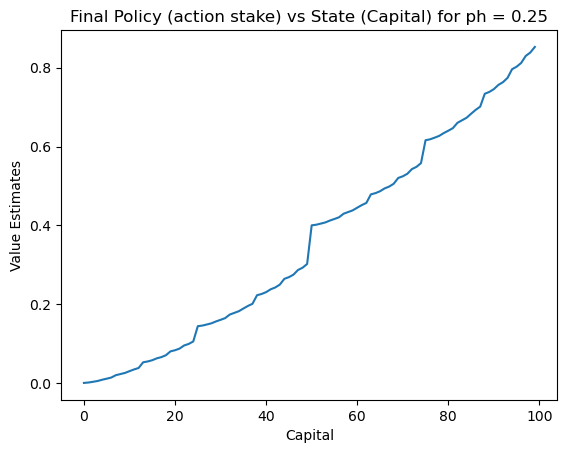

In [179]:
# Plotting Final Policy (action stake) vs State (Capital)

# x axis values
x = range(100)
# corresponding y axis values
y = v_025[:100]
 
# plotting the points 
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('Capital')
# naming the y axis
plt.ylabel('Value Estimates')
# giving a title to the graph
plt.title('Final Policy (action stake) vs State (Capital) for ph = 0.25')
 
# show plot
plt.show()

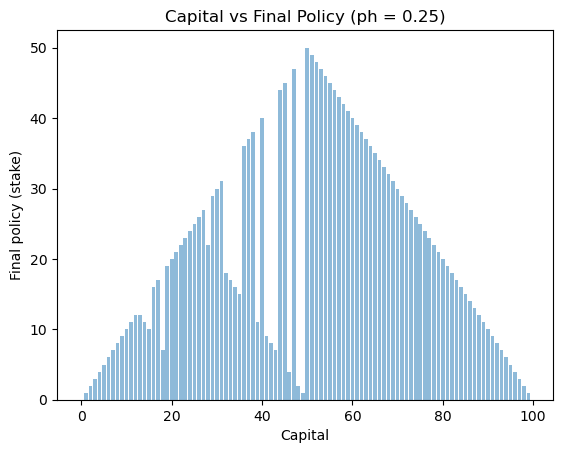

In [180]:
# Plotting Capital vs Final Policy

# x axis values
x = range(100)
# corresponding y axis values
y = policy_ph025
 
# plotting the bars
plt.bar(x, y, align='center', alpha=0.5)
 
# naming the x axis
plt.xlabel('Capital')
# naming the y axis
plt.ylabel('Final policy (stake)')
 
# giving a title to the graph
plt.title('Capital vs Final Policy (ph = 0.25)')
 
# show plot
plt.show()

In [181]:
gp_ph055 = GamblersProblem(0.55)
policy_ph055, v_055 = gp_ph055.value_iteration()

print("Optimized Policy:")
print(policy_ph055)
print("")

print("Optimized Value Function:")
print(v_055)
print("")

Optimized Policy:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 12. 14. 16. 15.
 17. 19. 18. 20. 22. 21. 20. 25. 24. 23. 24. 22. 28. 27. 19. 30. 29. 22.
 23. 26. 13. 14. 15. 16. 17. 18. 19. 30. 20. 22. 27. 23. 50. 49. 48. 47.
 46. 45. 44. 43. 42. 41. 40. 39. 38. 37. 36. 35. 34. 33. 32. 31. 30. 29.
 28. 27. 26. 25. 24. 23. 22. 21. 20. 19. 18. 17. 16. 15. 14. 13. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]

Optimized Value Function:
[0.         0.00984968 0.01995375 0.02831067 0.04031061 0.0488442
 0.05719592 0.07267048 0.08143557 0.0896484  0.0986778  0.10748848
 0.11556975 0.13875287 0.14683414 0.15528903 0.16455301 0.17263428
 0.18113167 0.19131638 0.19939765 0.20789504 0.21715902 0.22524029
 0.23348482 0.27225    0.28033127 0.2885758  0.29665707 0.30567067
 0.31331268 0.3215572  0.33243403 0.33991073 0.34822681 0.35787646
 0.36475251 0.37197775 0.38650037 0.39397707 0.40229315 0.4119428
 0.41881885 0.42604408 0.43870616 0.44540331 0.45242813 0.45999438
 0.46670874 0.

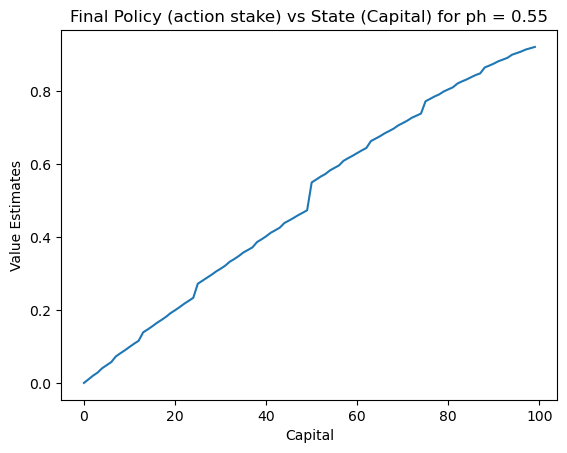

In [182]:
# Plotting Final Policy (action stake) vs State (Capital)

# x axis values
x = range(100)
# corresponding y axis values
y = v_055[:100]
 
# plotting the points 
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('Capital')
# naming the y axis
plt.ylabel('Value Estimates')
 
# giving a title to the graph
plt.title('Final Policy (action stake) vs State (Capital) for ph = 0.55')
 
# show the plot
plt.show()

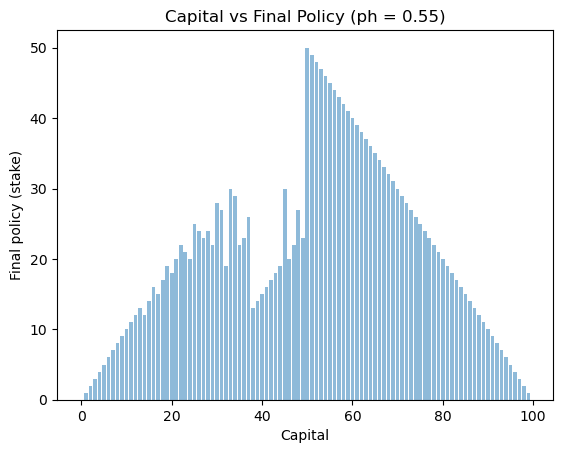

In [183]:
# Plotting Capital vs Final Policy

# x axis values
x = range(100)
# corresponding y axis values
y = policy_ph055
 
# plotting the bars
plt.bar(x, y, align='center', alpha=0.5)
 
# naming the x axis
plt.xlabel('Capital')
# naming the y axis
plt.ylabel('Final policy (stake)')
 
# giving a title to the graph
plt.title('Capital vs Final Policy (ph = 0.55)')
 
# show plot
plt.show()

## References
- reinforcement-learning (28-05-2018). Retrieved from github: https://github.com/dennybritz/reinforcement-learning/blob/master/DP/Gamblers%20Problem%20Solution.ipynb 
- Gambler’s Problem (13-12-2017). Retrieved from Medium: https://medium.com/@jaems33/gamblers-problem-b4e91040e58a 
- Richard S. Sutton and Andrew G. Barto (). Retrieved from Reinforcement Learning: An Introduction.